In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix

In [2]:
# Load train and test datasets
train_data = pd.read_csv(r"E:\study hard\uneeq\task2\MNIST-Handwritten Digit\train.csv")
test_data = pd.read_csv(r"E:\study hard\uneeq\task2\MNIST-Handwritten Digit\test.csv")

In [3]:
train_data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Separate labels and features
X_train = train_data.drop(labels=["label"], axis=1)
y_train = train_data["label"]

In [5]:
# Data overview
print("Dimension of train data:", X_train.shape)
print("Dimension of test data:", test_data.shape)

Dimension of train data: (42000, 784)
Dimension of test data: (28000, 784)


In [6]:
y_train.value_counts()

label
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: count, dtype: int64

C:\Users\shady\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='label', ylabel='Count'>

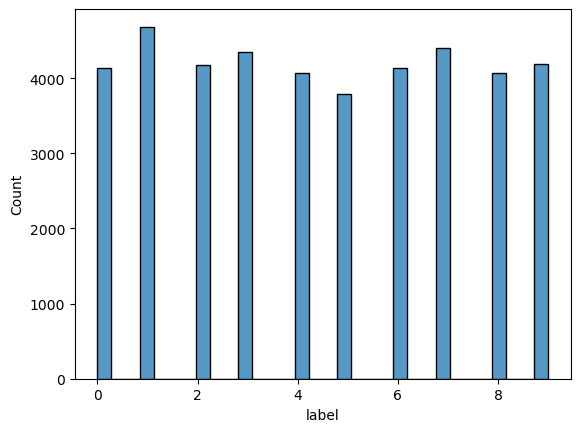

In [7]:
import seaborn as sns
sns.histplot(y_train)

In [8]:
# Splitting data into training and validation dataset
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [9]:
print(len(test_data.values))
print(len(train_data.values))

28000
42000


In [10]:
# Reshape data
X_train = X_train.values.reshape(-1, 28, 28, 1)
X_val = X_val.values.reshape(-1, 28, 28, 1)
X_test = test_data.values.reshape(-1, 28, 28, 1)

In [11]:
X_train

array([[[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]]],


       [[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],


In [12]:
# Normalize data
X_train = X_train.astype('float32') / 255.0
X_val = X_val.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [13]:
# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)

In [32]:
# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

In [33]:
# Summary of the model
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [35]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_val, to_categorical(y_val, 10)))

Epoch 1/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.7934 - loss: 0.7333 - val_accuracy: 0.9658 - val_loss: 0.1177
Epoch 2/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9740 - loss: 0.0886 - val_accuracy: 0.9767 - val_loss: 0.0765
Epoch 3/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9812 - loss: 0.0626 - val_accuracy: 0.9824 - val_loss: 0.0561
Epoch 4/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9843 - loss: 0.0496 - val_accuracy: 0.9831 - val_loss: 0.0510
Epoch 5/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9881 - loss: 0.0407 - val_accuracy: 0.9846 - val_loss: 0.0492
Epoch 6/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9912 - loss: 0.0303 - val_accuracy: 0.9856 - val_loss: 0.0429
Epoch 7/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9919 - loss: 0.0248 - val_accuracy: 0.9844 - val_loss: 0.0520
Epoch 8/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9934 - loss: 0.0213 - val_accu

In [36]:
# Evaluate model on validation data
val_loss, val_accuracy = model.evaluate(X_val, to_categorical(y_val, 10))
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9868 - loss: 0.0437
Validation Loss: 0.04016444832086563
Validation Accuracy: 0.9871428608894348


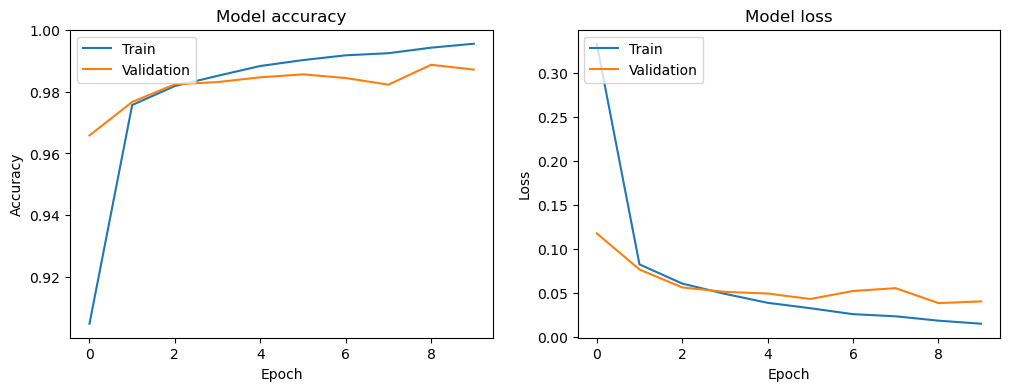

In [37]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


In [22]:
# Save the model
model.save("mnist_cnn_model.h5")

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from PIL import Image, ImageDraw, ImageFont

# Load the saved model
model = load_model(r"C:\Users\shady\uneeq intership tasks\mnist_cnn_model.h5")

# Load the test dataset
X_test = test_data.to_numpy()
# Assuming X_test is your test dataset
total_indices = len(X_test)
print(total_indices)

28000


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


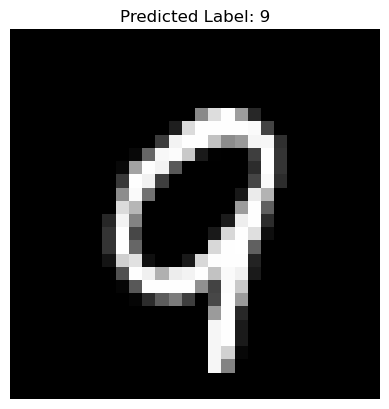

In [24]:
# Check if the test dataset is not empty
if total_indices == 0:
    print("Test dataset is empty.")
else:
    # Randomly select an index within the range of the test dataset
    random_index = np.random.randint(0, total_indices)

    # Get the corresponding image
    random_image = X_test[random_index]

    # Make a prediction using the loaded model
    prediction = model.predict(random_image.reshape(1, 28, 28, 1))
    predicted_label = np.argmax(prediction)

    # Display the image and predicted result
    plt.imshow(random_image.reshape(28, 28), cmap='gray')
    plt.title(f'Predicted Label: {predicted_label}')
    plt.axis('off')